<a href="https://colab.research.google.com/github/owenburton/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module1-linear-algebra-review/Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

[[1]
 [1]]


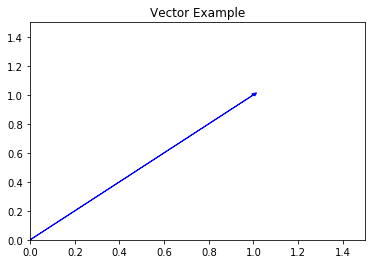

In [11]:
import numpy as np
import matplotlib.pyplot as plt

two_d_vector = np.array([[1], [1]])

print(two_d_vector)

plt.arrow(0, 0, 1, 1, head_width=.02, head_length=0.02, color = 'b')
plt.xlim(0,1.5)          
plt.ylim(0,1.5)
plt.title('2D Vector Example')
plt.show()

## 1.2 Create a three-dimensional vecor and plot it on a graph

[[1]
 [1]
 [1]]


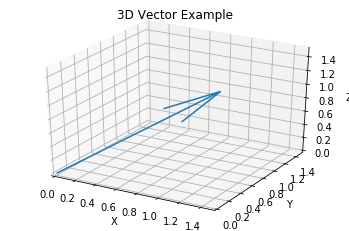

In [17]:
from mpl_toolkits.mplot3d import Axes3D

three_d_vector = np.array([[1], [1], [1]])

print(three_d_vector)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, 1, 1, 1, length=1)
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 1.5])
ax.set_zlim([0, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Vector Example')
plt.show()

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

In [20]:
from math import e, pi
print(e)
print(pi)

2.718281828459045
3.141592653589793


In [42]:
# Scale the two dimensional vector
print('Scaled by 5:\n', two_d_vector*5)
print('Scaled by pi:\n',two_d_vector*pi)
print('Scaled by -e:\n',two_d_vector*(-e))

Scaled by 5:
 [[5]
 [5]]
Scaled by pi:
 [[3.14159265]
 [3.14159265]]
Scaled by -e:
 [[-2.71828183]
 [-2.71828183]]


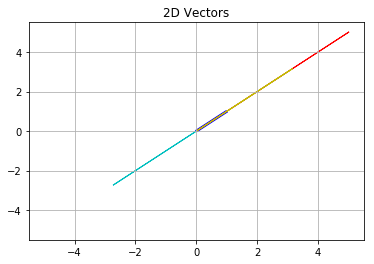

In [50]:
# Plot the scaled two dimensional vector
fig, ax = plt.subplots()
plt.arrow(0, 0, 1, 1, head_width=.02, width=.08, head_length=0.02, color = 'b')
plt.arrow(0, 0, 5, 5, head_width=.02, head_length=0.02, color = 'r')
plt.arrow(0, 0, pi, pi, head_width=.02, head_length=0.02, color = 'y')
plt.arrow(0, 0, -e, -e, head_width=.02, head_length=0.02, color = 'c')
plt.xlim(-5.5,5.5)          
plt.ylim(-5.5,5.5)
plt.title('2D Vectors')
ax.grid()
plt.show()

They're the same as the original vector, but stretched by a factor of 5, pi, and e. The vector scaled by e is also going the opposite direction since it was scales by negative e.

In [43]:
# Scale the three dimensional vector.
print('Scaled by 5:\n', three_d_vector*5)
print('Scaled by pi:\n',three_d_vector*pi)
print('Scaled by -e:\n',three_d_vector*(-e))

Scaled by 5:
 [[5]
 [5]
 [5]]
Scaled by pi:
 [[3.14159265]
 [3.14159265]
 [3.14159265]]
Scaled by -e:
 [[-2.71828183]
 [-2.71828183]
 [-2.71828183]]


[[1]
 [1]
 [1]]


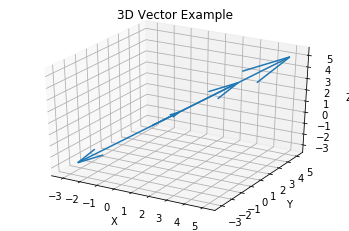

In [53]:
# Plot the 3d vectors.
vectors = np.array([[0, 0, 0, 1, 1, 1],
                    [0, 0, 0, 5, 5, 5], 
                    [0, 0, 0, pi, pi, pi],
                    [0, 0, 0, -e, -e, -e]])

X, Y, Z, U, V, W = zip(*vectors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-3.5, 5.5])
ax.set_ylim([-3.5, 5.5])
ax.set_zlim([-3.5, 5.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Vector Example')
plt.show()

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

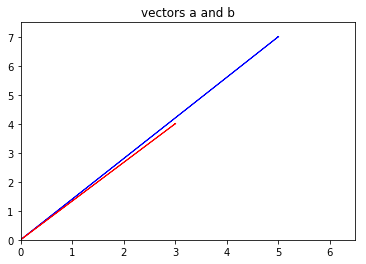

In [58]:
# Plot a and b

plt.arrow(0, 0, 5, 7, head_width=.02, head_length=0.02, color = 'b')
plt.arrow(0, 0, 3, 4, head_width=.02, head_length=0.02, color = 'r')

plt.xlim(0,6.5)          
plt.ylim(0,7.5)
plt.title('vectors a and b')
plt.show()

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

In [59]:
# c = a-b
a = np.array([[5], [7]])
b = np.array([[3], [4]])
c = a-b

print(c)

[[2]
 [3]]


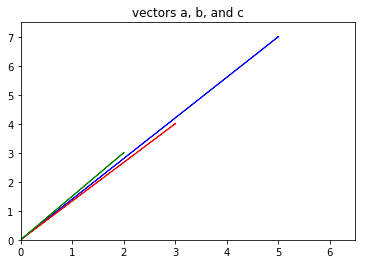

In [60]:
# Plot a, b, and c
plt.arrow(0, 0, 5, 7, head_width=.02, head_length=0.02, color = 'b')
plt.arrow(0, 0, 3, 4, head_width=.02, head_length=0.02, color = 'r')
plt.arrow(0, 0, 2, 3, head_width=.02, head_length=0.02, color = 'g')

plt.xlim(0,6.5)          
plt.ylim(0,7.5)
plt.title('vectors a, b, and c')
plt.show()

The relationship between all the vectors is that $\vec{a-b}$ is $\vec{a}$ substracted by $\vec{b}$.

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [62]:
# Dot product of vectors c and d.
c = np.array([7, 22, 4, 16])
d = np.array([12, 6, 2, 9])

print(np.dot(c, d))

368


##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [69]:
# Cross product of e and f.
e = np.array([5, 7, 2])
f = np.array([3, 4, 6])

print(np.cross(e, f))

[ 34 -24  -1]


## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [76]:
g = np.array([1, 1, 1, 8])
h = np.array([3, 3, 3, 3])

def vec_norm_compare(a, b):
  a_norm = np.linalg.norm(a)
  b_norm = np.linalg.norm(b)
  print(f'The norm of vector g is: {a_norm}')
  print(f'The norm of vector h is: {b_norm}')
  if a_norm > b_norm:
    print(f'{a} is longer.')
  elif b_norm > a_norm:
    print(f'{b} is longer.')
  else:
    print('The two vectors are equal in length.')
  return

vec_norm_compare(g, h)

The norm of vector g is: 8.18535277187245
The norm of vector h is: 6.0
[1 1 1 8] is longer.


# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [99]:
import itertools

A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[2, 4, 6]])
C = np.array([[9, 6, 3], [4, 7, 11]])
D = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
E = np.array([[1, 3], [5, 7]])

names = ['A', 'B', 'C', 'D', 'E']
matrices = [A, B, C, D, E]

for mat1, mat2 in itertools.product(zip(names, matrices), zip(names, matrices)):
   if mat1[1].shape[1] == mat2[1].shape[0]:
    print(f'You can multiply {mat1[0]} by {mat2[0]}, the result is \n {np.matmul(mat1[1], mat2[1])}')
   else:
    print(f'You cannot multiply {mat1[0]} by {mat2[0]}')

You cannot multiply A by A
You cannot multiply A by B
You can multiply A by C, the result is 
 [[17 20 25]
 [43 46 53]
 [69 72 81]]
You cannot multiply A by D
You can multiply A by E, the result is 
 [[11 17]
 [23 37]
 [35 57]]
You can multiply B by A, the result is 
 [[44 56]]
You cannot multiply B by B
You cannot multiply B by C
You can multiply B by D, the result is 
 [[2 4 6]]
You cannot multiply B by E
You can multiply C by A, the result is 
 [[ 42  60]
 [ 80 102]]
You cannot multiply C by B
You cannot multiply C by C
You can multiply C by D, the result is 
 [[ 9  6  3]
 [ 4  7 11]]
You cannot multiply C by E
You can multiply D by A, the result is 
 [[1 2]
 [3 4]
 [5 6]]
You cannot multiply D by B
You cannot multiply D by C
You can multiply D by D, the result is 
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
You cannot multiply D by E
You cannot multiply E by A
You cannot multiply E by B
You can multiply E by C, the result is 
 [[21 27 36]
 [73 79 92]]
You cannot multiply E by D
You can multiply E

## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [102]:
CD = np.matmul(C, D)
AE = np.matmul(A, E)
BA = np.matmul(B, A)

print(f'The product of C and D is:\n {CD}. \n The dimensions are: {CD.shape}')
print(f'The product of A and E is:\n {AE}. \n The dimensions are: {AE.shape}')
print(f'The product of B and A is:\n {BA}. \n The dimensions are: {BA.shape}')

The product of C and D is:
 [[ 9  6  3]
 [ 4  7 11]]. 
 The dimensions are: (2, 3)
The product of A and E is:
 [[11 17]
 [23 37]
 [35 57]]. 
 The dimensions are: (3, 2)
The product of B and A is:
 [[44 56]]. 
 The dimensions are: (1, 2)


They're related because the product matrix has the same number of rows as the first factor matrix and the same number of columns as the second factor matrix.

## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [105]:
F = np.array([[20, 19, 18, 17], [16, 15, 14, 13], [12, 11, 10, 9],
              [8, 7, 6, 5], [4, 3, 2, 1]])

F_transpose = F.T

print(F_transpose)

[[20 16 12  8  4]
 [19 15 11  7  3]
 [18 14 10  6  2]
 [17 13  9  5  1]]


The numbers along the main diagonal of the original matrix and its transpose do not change.

In [106]:
# Dimensions of F
print(F.shape)

(5, 4)


In [107]:
# Dimensions of F^T
print(F_transpose.shape)

(4, 5)


# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [110]:
I = np.array([[1, 0], [0, 1]])
G = np.array([[12, 11], [7, 10]])

print(np.matmul(I, G))

[[12 11]
 [ 7 10]]


## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [0]:
H = G
J = np.array([[0, 1, 2], [7, 10, 4], [3, 2, 0]])

In [116]:
# Determinant of H
np.linalg.det(H)

43.000000000000014

In [113]:
# Determinant of J
np.linalg.det(J)

-19.999999999999996

## 3.3 Find $H^{-1}$ and then find $J^{-1}$

In [121]:
# Inverse of H
H_inv = np.linalg.inv(H)
print(H_inv)

[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]


In [122]:
# Inverse of J
J_inv = np.linalg.inv(J)
print(J_inv)

[[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $J^{-1}J$. Is $HH^{-1} == J^{-1}J$? Why or Why not?

In [123]:
# H times its inverse.
print(np.matmul(H, H_inv))

[[1.00000000e+00 5.55111512e-16]
 [2.22044605e-16 1.00000000e+00]]


In [124]:
# Inverse of J times J.
print(np.matmul(J_inv, J))

[[ 1.00000000e+00  2.22044605e-16  0.00000000e+00]
 [-1.11022302e-16  1.00000000e+00  0.00000000e+00]
 [-1.66533454e-16 -1.11022302e-16  1.00000000e+00]]


They're not equal. They are both identity matrices, but they don't have the same dimensions.

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

